<a href="https://colab.research.google.com/github/wilmerod/Notebooks-Curso-Big-Data/blob/main/8_EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis exploratorio de datos (EDA) en el caso Titanic

El reto

El hundimiento del Titanic es uno de los naufragios más conocidos de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que supuso la muerte de 1502 de los 2224 pasajeros y de la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

##Referencias
https://www.kaggle.com/c/titanic

https://www.kaggle.com/showeed/starter-book-begginer-analysis/notebook

# Importar librerías

In [1]:
import pandas as pd

#Obtener los datos
Descargamos el fichero en local y lo subimos a Google Colab

https://www.kaggle.com/c/titanic/data?select=train.csv

In [2]:
#train_data = pd.read_csv("train.csv")
train_data = pd.read_csv("sample_data/train.csv")


Examinamos los datos cargados

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Información de los campos o features ("características")

"PassengerId" es el número de pasajero

"Survived" indica si el pasajero sobrevivió (valor 1) o no sobrevivió (valor 0) al naufragio

"Pclass" es la clase: primera clase, segunda clase y tercera clase 

"Name" es el nombre del pasajero

"Sex" es el sexo del pasajero: male (masculino) o female (femenino)

"Age" es la edad del pasajero

"SibSp" es la abreviatura de "Siblings and Spouses" que se traduce como "Hermanos y Esposas" que se embarcaron con el pasajero

"Parch" es la abreviatura de "Parents and children", esto es, el número de padres / hijos que se embarcaron con el pasajero

"Ticket" es el código del billete

"Fare" es la tarifa o precio del billete

"Cabin" es el camarote del pasajero

"Embarked" es la inicial del puerto donde embarcó el pasajero: C = Cherbourg; Q = Queenstown; S = Southampton


Comprobamos el tamaño del DataFrame 



In [5]:
train_data.size

10692

- Número de filas
- Número de columnas

In [ ]:
train_data.shape

(891, 12)

In [ ]:
#Filas
train_data.shape[0]

891

In [ ]:
#Filas
len(train_data)

891

In [ ]:
#Columnas
train_data.shape[1]

12

Nombres de las columnas

In [ ]:
for x in train_data.columns:
  print(x)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


Examinamos el contenido del DataFrame: 
- Datos no nulos
- Tipos de datos


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos ver que hay valores nulos en algunos campos o variables. Veamos cuántos son:

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aquí podemos ver el número de valores que faltan en cada columna. Esos valores que faltan pueden causar un problema cuando los necesitemos, y lo solucionaremos más adelante

Examinamos valores estadísticos del DataFrame

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Examinamos la cantidad de valores únicos de cada campo

In [ ]:
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
train_data['Survived'].unique()

array([0, 1])

In [ ]:
len(train_data['Survived'].unique())

2

In [ ]:
print("Los valores únicos de cada columna son:")
for x in train_data.columns:
  print(x,len(train_data[x].unique()))

Los valores únicos de cada columna son:
PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


Examinamos los valores y hacemos recuento de valores de los campos con pocos valores únicos

In [ ]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#Número de hermanos y esposas embarcados  
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
#Número de padres e hijos embarcados
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
#Puerto de embarque/salida: C = Cherbourg; Q = Queenstown; S = Southampton
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

El campo Age (edad) tiene 89 posibles valores. Los vamos a agrupar por tramos donde cada tramo es un decenio para ver mejor su distribución. Esto es: de 0 a 10 años, de 10 a 20 años, etc.

In [ ]:
train_data['Age_2']=train_data['Age'].apply(lambda x: 10*round(x/10,0))
train_data['Age_2'].value_counts()

20.0    223
30.0    178
40.0    132
50.0     61
0.0      44
60.0     34
10.0     34
70.0      7
80.0      1
Name: Age_2, dtype: int64

Lo ordenamos

In [ ]:
train_data['Age_2'].value_counts().sort_index()

0.0      44
10.0     34
20.0    223
30.0    178
40.0    132
50.0     61
60.0     34
70.0      7
80.0      1
Name: Age_2, dtype: int64

Pero no tenemos todas las edades: hay 891 pasejeros y ya habíamos visto que en el campo Age solo se conoce la edad de 714 pasajeros 

In [ ]:
train_data['Age_2'].value_counts().sum()

714

Eliminamos la columna Age_2 que hemos añadido al DataFrame

In [ ]:
del train_data['Age_2']

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Veamos cuántos sobrevivieron al naufragio

In [ ]:
survived_count = train_data.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

Y podemos ver cuántos sobrevivieron al naufragio según su género

In [ ]:
survived_count = train_data.groupby(['Sex','Survived'])['Survived'].count()
survived_count

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

#Visualización de los datos

La visualización permite explorar los datos de forma más rápida y aproximarnos mejor a la información que pueden aportar

In [23]:
#Importamos librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Visualizamos un campo o variable

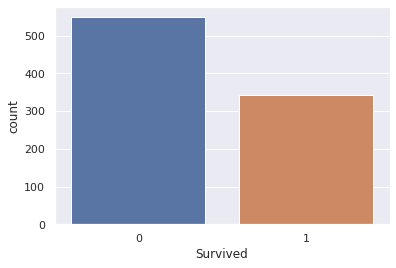

In [ ]:
sns.countplot(data=train_data, x="Survived")
plt.show()

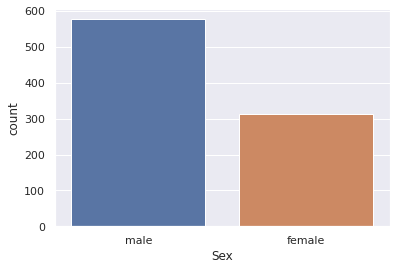

In [ ]:
sns.countplot(data=train_data, x="Sex")
plt.show()

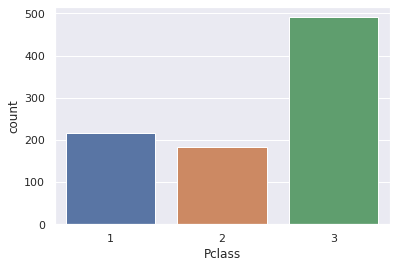

In [ ]:
sns.countplot(data=train_data, x="Pclass")
plt.show()

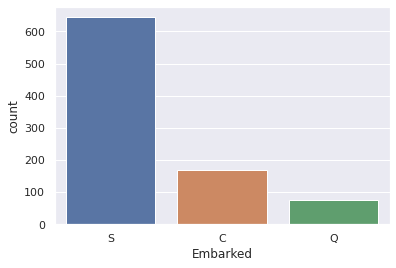

In [ ]:
sns.countplot(data=train_data, x="Embarked")
plt.show()

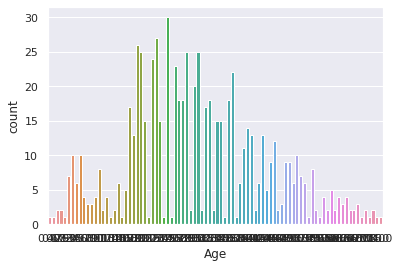

In [ ]:
sns.countplot(data=train_data, x="Age")
plt.show()

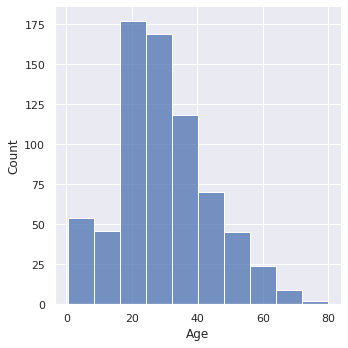

In [ ]:
#Usamos gráfico de frecuencias agrupadas
sns.displot(data=train_data, x="Age",bins=10)
plt.show()

##Estudio de correlaciones

Analizamos relaciones entre variables para saber qué variables influyen en el resultado (sobrevivir o no)

¿qué factores influyen en la supervivencia de cada pasajero?

¿género?

¿edad?

¿clase de pasaje?

¿tarifa del billete?

¿número de familiares embarcados?

¿puerto de salida?


¿Influye el género para sobrevivir?

In [7]:
mask = train_data['Sex']=='female'

In [8]:
train_data[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
train_data[train_data['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
train_data[train_data['Survived']== 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
train_data[(train_data['Sex']=='female') & (train_data['Survived']== 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [12]:
train_data['Sex'] == 'female'

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [13]:
#Filtramos para obtener sólo las mujeres
train_data[(train_data['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
woman_train_data = train_data[(train_data['Sex'] == 'female')]

In [15]:
#¿Cuántas mujeres sobrevivieron?
woman_train_data['Survived']

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

Las que sobrevivieron

In [16]:
woman_train_data['Survived'].sum()

233

Las que viajaron

In [17]:
woman_train_data['Survived'].count()

314

In [18]:
woman_train_data['Survived'].sum()/woman_train_data['Survived'].count()

0.7420382165605095

In [19]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% de mujeres que sobrevivieron:", rate_women)

% de mujeres que sobrevivieron: 0.7420382165605095


In [20]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% de hombres que sobrevivieron:", rate_men)

% de hombres que sobrevivieron: 0.18890814558058924


Mediante gráficos podemos observar más fácilmente cómo afectan determinadas variables al resultado de sobrevivir

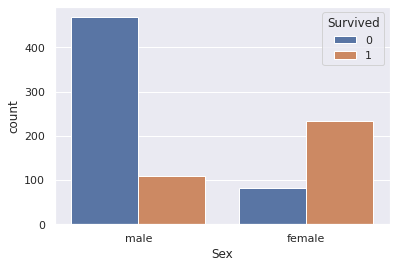

In [24]:
sns.countplot(data=train_data, x="Sex", hue="Survived")
plt.show()

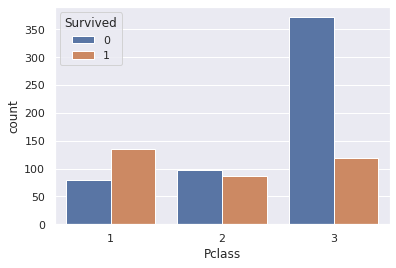

In [25]:
sns.countplot(data=train_data, x="Pclass", hue="Survived")
plt.show()

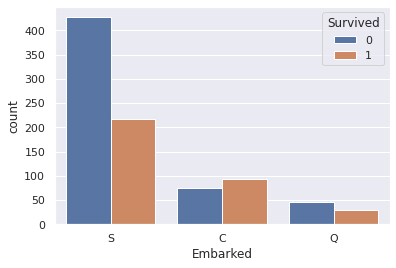

In [26]:
sns.countplot(data=train_data, x="Embarked", hue="Survived")
plt.show()

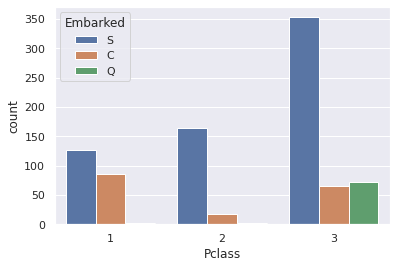

In [28]:
sns.countplot(data=train_data, x="Pclass", hue="Embarked")
plt.show()

Podemos también ver algunas relaciones entre variables

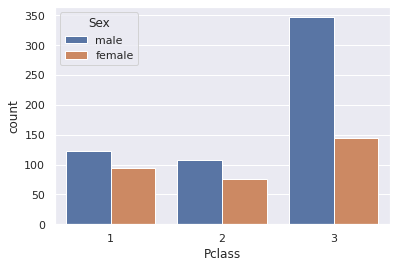

In [27]:
sns.countplot(data=train_data, x="Pclass", hue="Sex")
plt.show()

Podemos ver mediante un mapa de calor las correlaciones entre todas las variables con valores númericas

In [29]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Calculamos la matriz de correlaciones con el método .corr()

In [30]:
train_corr=train_data.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


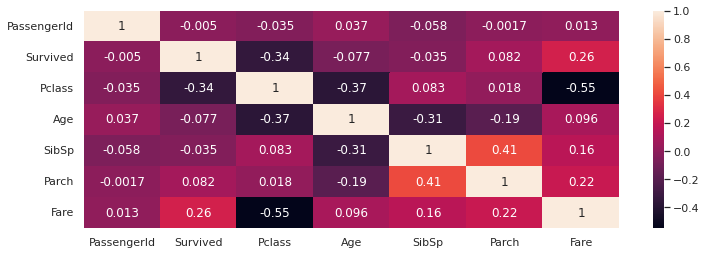

In [32]:
fig,ax = plt.subplots(figsize=(12,4))

sns.heatmap(train_corr, annot=True)

Para ver correlaciones con variables no numéricas será necesario convertir las variables no numéricas en variables numéricas

##Gráfico de cajas (Boxplot)

Un gráfico o diagrama de caja (o diagrama de caja y bigotes) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable categórica. El cuadro muestra los cuartiles del conjunto de datos mientras que los bigotes se extienden para mostrar el resto de la distribución, excepto para los puntos que se determinan como "valores atípicos" mediante un método que es una función del rango intercuartil.

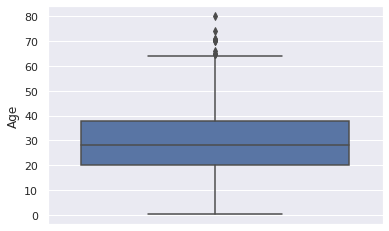

In [40]:
sns.boxplot(y=train_data['Age'])
plt.show()

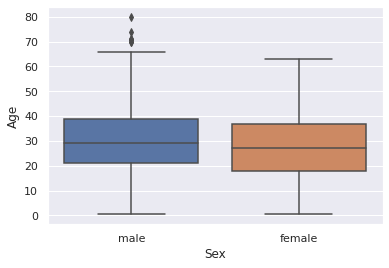

In [41]:
sns.boxplot(x=train_data['Sex'],y=train_data['Age'])
plt.show()

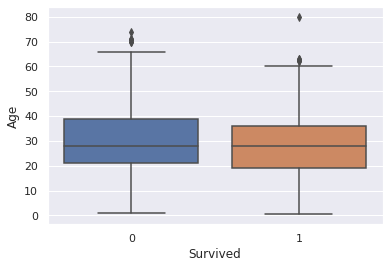

In [42]:
sns.boxplot(x=train_data['Survived'],y=train_data['Age'])
plt.show()

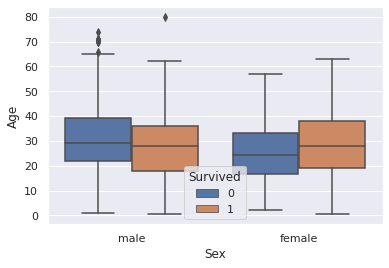

In [43]:
sns.boxplot(x=train_data['Sex'],y=train_data['Age'], hue=train_data['Survived'])
plt.show()

Podemos observar que la media de edad de los hombres que sobrevivieron era menor que los que fallecieron y en el caso de las mujeres sucedió al contrario, esto es, es mayor la media de edad de las mujeres que sobrevivieron respecto a las que fallecieron

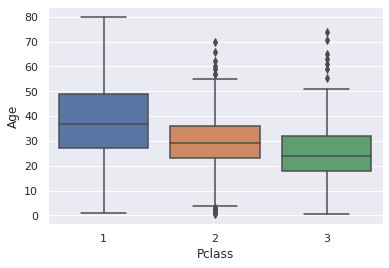

In [44]:
sns.boxplot(x=train_data['Pclass'],y=train_data['Age'])
plt.show()

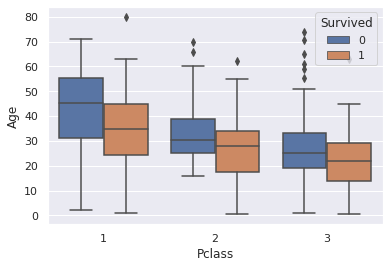

In [45]:
sns.boxplot(x=train_data['Pclass'],y=train_data['Age'], hue=train_data['Survived'])
plt.show()

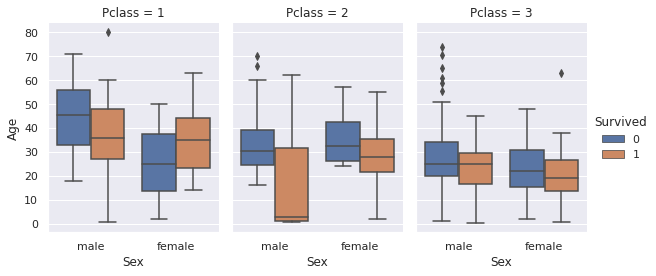

In [46]:
sns.catplot(x="Sex", y="Age",
                hue="Survived", col="Pclass",
                data=train_data, kind="box",
                height=4, aspect=.7);

##Violin Plot

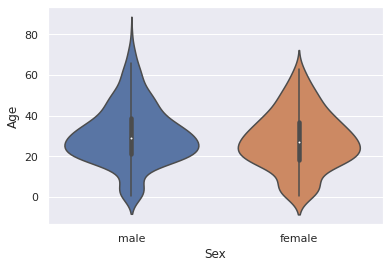

In [ ]:
sns.violinplot(x=train_data['Sex'],y=train_data['Age'])
plt.show()

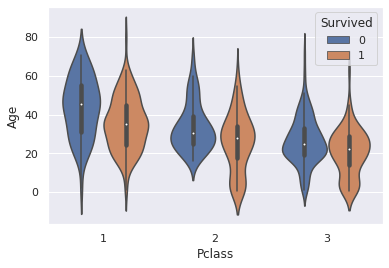

In [ ]:
sns.violinplot(x=train_data['Pclass'],y=train_data['Age'], hue=train_data['Survived'])
plt.show()

##Boxenplot

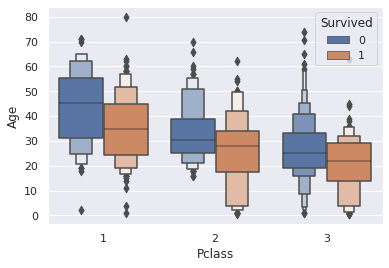

In [ ]:
sns.boxenplot(x=train_data['Pclass'],y=train_data['Age'], hue=train_data['Survived'])
plt.show()

##Swarmplot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


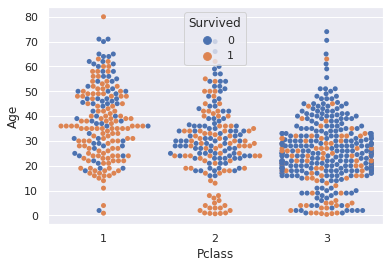

In [ ]:
sns.swarmplot(x=train_data['Pclass'],y=train_data['Age'], hue=train_data['Survived'])
plt.show()